<a href="https://colab.research.google.com/github/Vibikshaj/AI_Vibiksha/blob/main/DIABETES_MODEL_TRAINING_PHASE4_4053.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

COLLECTION AND ANALYSIS OF DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
diabetes_dataset = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

In [ ]:
# Printing the first ten row of the dataset
diabetes_dataset.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [ ]:
# Printing the last ten row of the dataset
diabetes_dataset.tail(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
758            1      106             76              0        0  37.5   
759            6      190             92              0        0  35.5   
760            2       88             58             26       16  28.4   
761            9      170             74             31        0  44.0   
762            9       89             62              0        0  22.5   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
758                     0.197   26        0  
759                     0.278   66        1  
760                     0.766   22        0  
761                     0.403   43        1  
762                     0.142   33        0  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [ ]:
#Total number of rows & Columns
print("Total no of rows and coulmns=",diabetes_dataset.shape)

#statistical measure of the data
print("statistical measure")
diabetes_dataset.describe()

Total no of rows and coulmns= (768, 9)
statistical measure


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
#outcome
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

1=DIABETIC 0=NON DIABETIC

In [ ]:
#outcome grouped my mean
print("outcome grouped my mean")
diabetes_dataset.groupby('Outcome').mean()


outcome grouped my mean


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164

In [ ]:

#outcome grouped my standard deviation
print("outcome grouped my standard deviation")
diabetes_dataset.groupby('Outcome').std()

outcome grouped my standard deviation


Pregnancies    Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                     
0           3.017185  26.141200      18.063075      14.889947   98.865289   
1           3.741239  31.939622      21.491812      17.679711  138.689125   

              BMI  DiabetesPedigreeFunction        Age  
Outcome                                                 
0        7.689855                  0.299085  11.667655  
1        7.262967                  0.372354  10.968254

In [ ]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']
print (X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


DATA ANALYSIS THROUGH GRAPHS

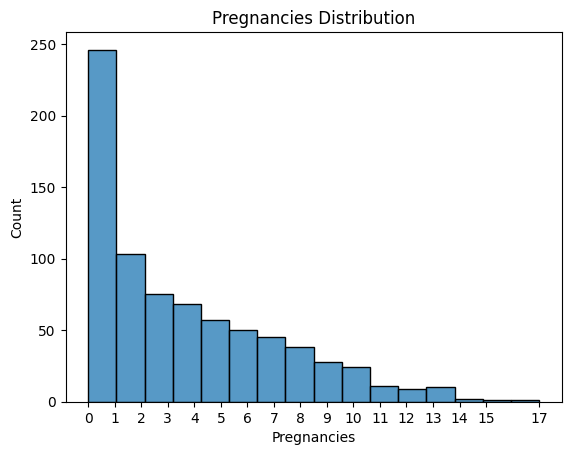

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
cols =diabetes_dataset.columns
colors = ['Blue',"Green","Red","Black"]
plt.title(f"{cols[0]} Distribution")
sns.histplot(data=diabetes_dataset, x=diabetes_dataset[cols[0]])
plt.xticks(ticks=[i for i in diabetes_dataset[cols[0]].unique()])
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

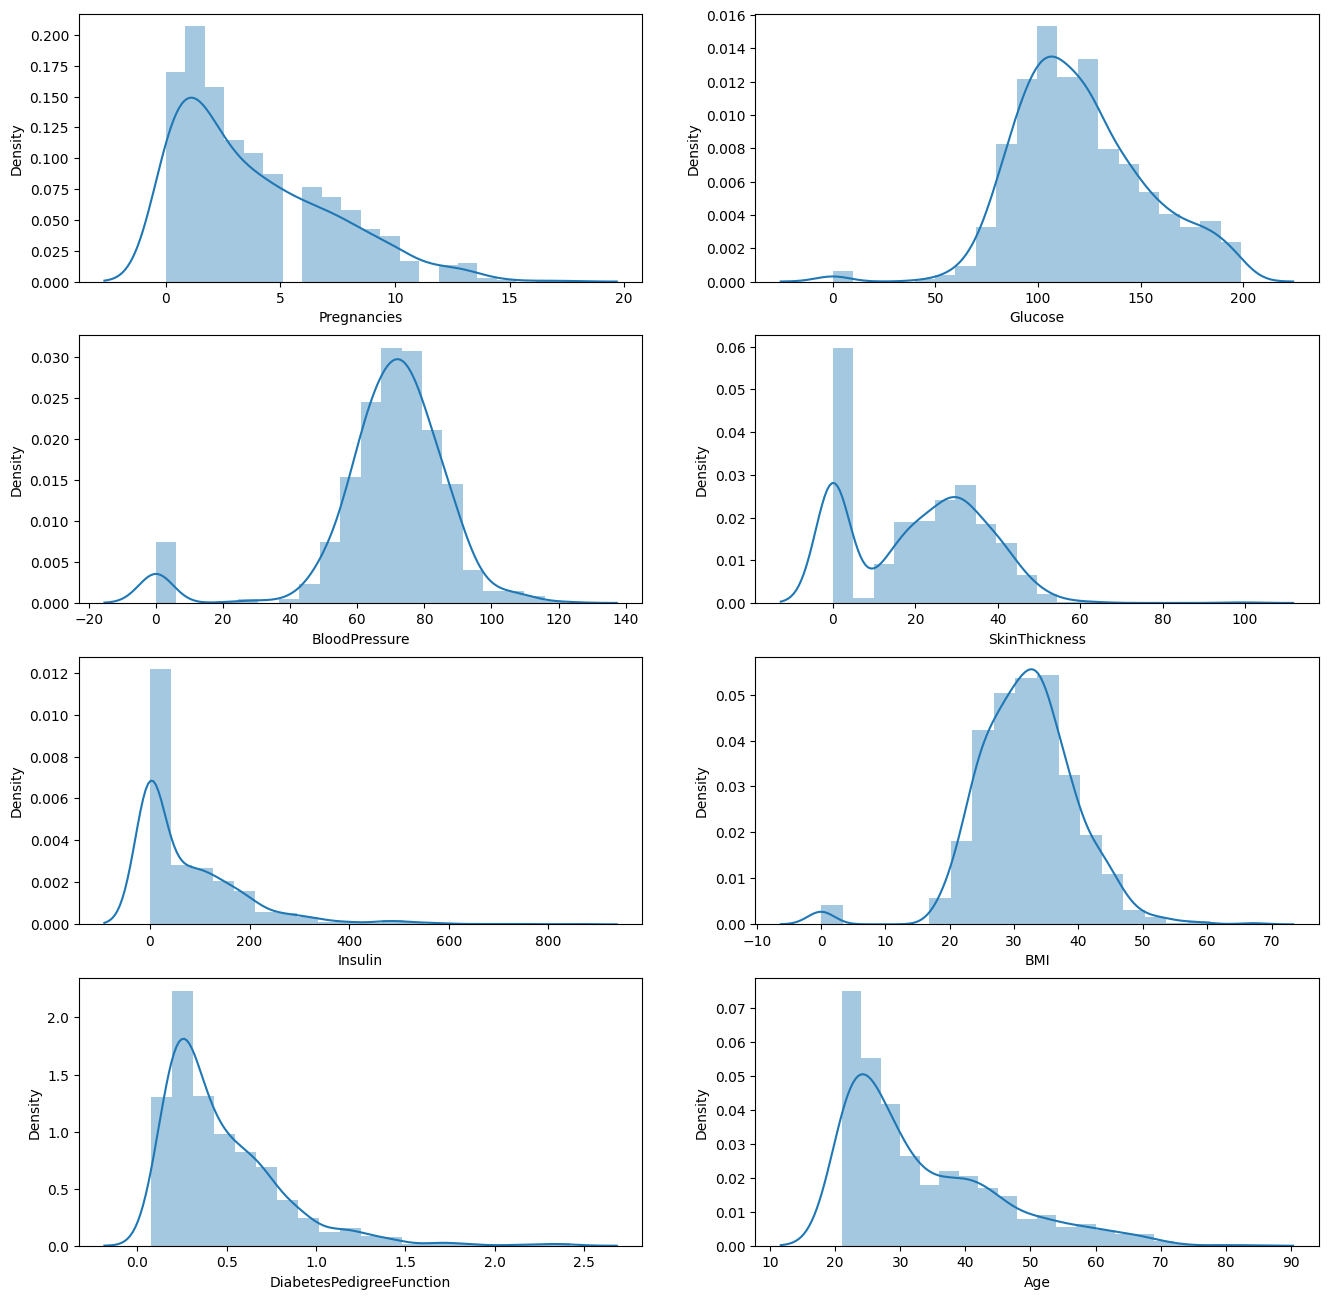

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(diabetes_dataset.Pregnancies, bins = 20, ax=ax[0,0])
sns.distplot(diabetes_dataset.Glucose, bins = 20, ax=ax[0,1])
sns.distplot(diabetes_dataset.BloodPressure, bins = 20, ax=ax[1,0])
sns.distplot(diabetes_dataset.SkinThickness, bins = 20, ax=ax[1,1])
sns.distplot(diabetes_dataset.Insulin, bins = 20, ax=ax[2,0])
sns.distplot(diabetes_dataset.BMI, bins = 20, ax=ax[2,1])
sns.distplot(diabetes_dataset.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0])
sns.distplot(diabetes_dataset.Age, bins = 20, ax=ax[3,1])

<Axes: xlabel='Age', ylabel='Count'>

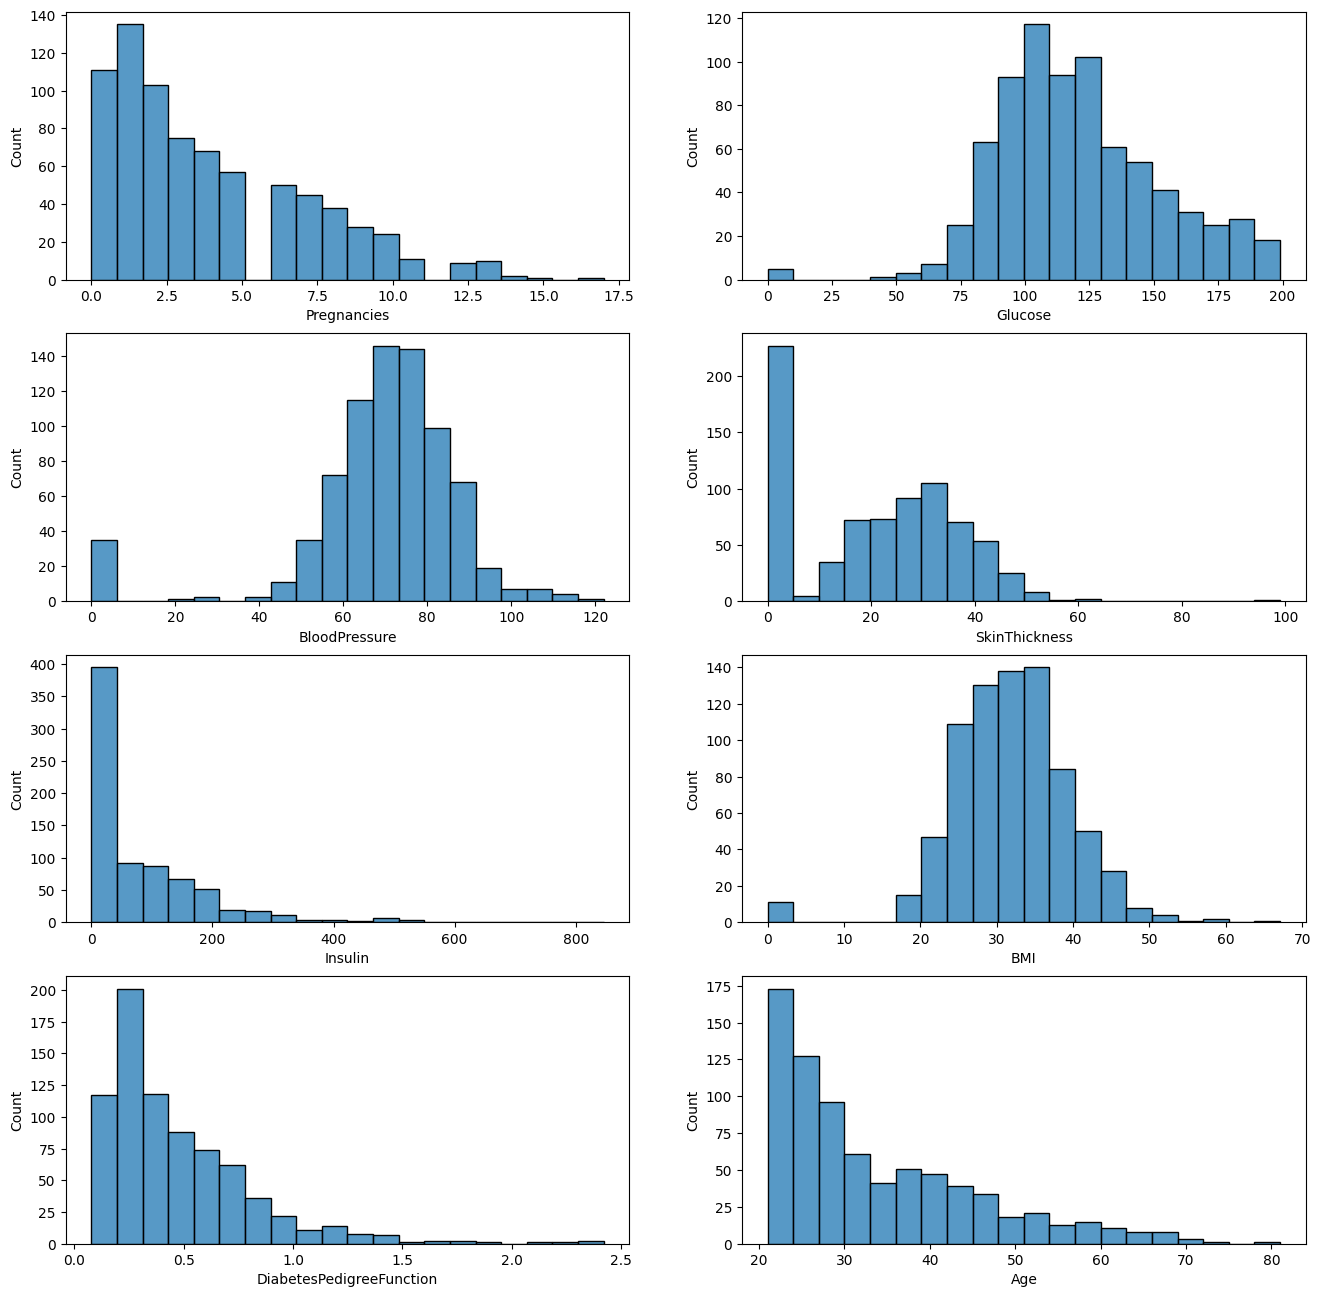

In [ ]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.histplot(diabetes_dataset.Pregnancies, bins = 20, ax=ax[0,0])
sns.histplot(diabetes_dataset.Glucose, bins = 20, ax=ax[0,1])
sns.histplot(diabetes_dataset.BloodPressure, bins = 20, ax=ax[1,0])
sns.histplot(diabetes_dataset.SkinThickness, bins = 20, ax=ax[1,1])
sns.histplot(diabetes_dataset.Insulin, bins = 20, ax=ax[2,0])
sns.histplot(diabetes_dataset.BMI, bins = 20, ax=ax[2,1])
sns.histplot(diabetes_dataset.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0])
sns.histplot(diabetes_dataset.Age, bins = 20, ax=ax[3,1])

Having Diebetes:	268
Not Having Diebetes:	500
diabetes_percentage:	0.35 %
not diabetes_percentage:	0.65 %


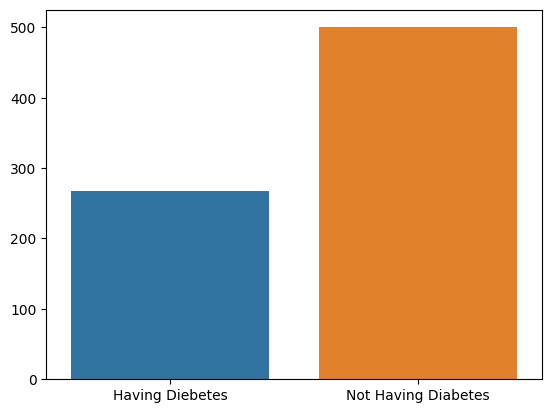

In [ ]:
having_diabetes = diabetes_dataset[diabetes_dataset["Outcome"]==1]
not_having = diabetes_dataset[~(diabetes_dataset["Outcome"]==1)]



print("Having Diebetes:\t"+ str(len(having_diabetes)))
print("Not Having Diebetes:\t"+ str(len(not_having
                                       )))
sns.barplot(x=['Having Diebetes','Not Having Diabetes'], y= [len(having_diabetes),len(not_having)],

           )

print("diabetes_percentage:\t" + str(round(len(having_diabetes)/len(diabetes_dataset),2)) + " %")
print("not diabetes_percentage:\t" + str(round(len(not_having)/len(diabetes_dataset),2)) + " %")

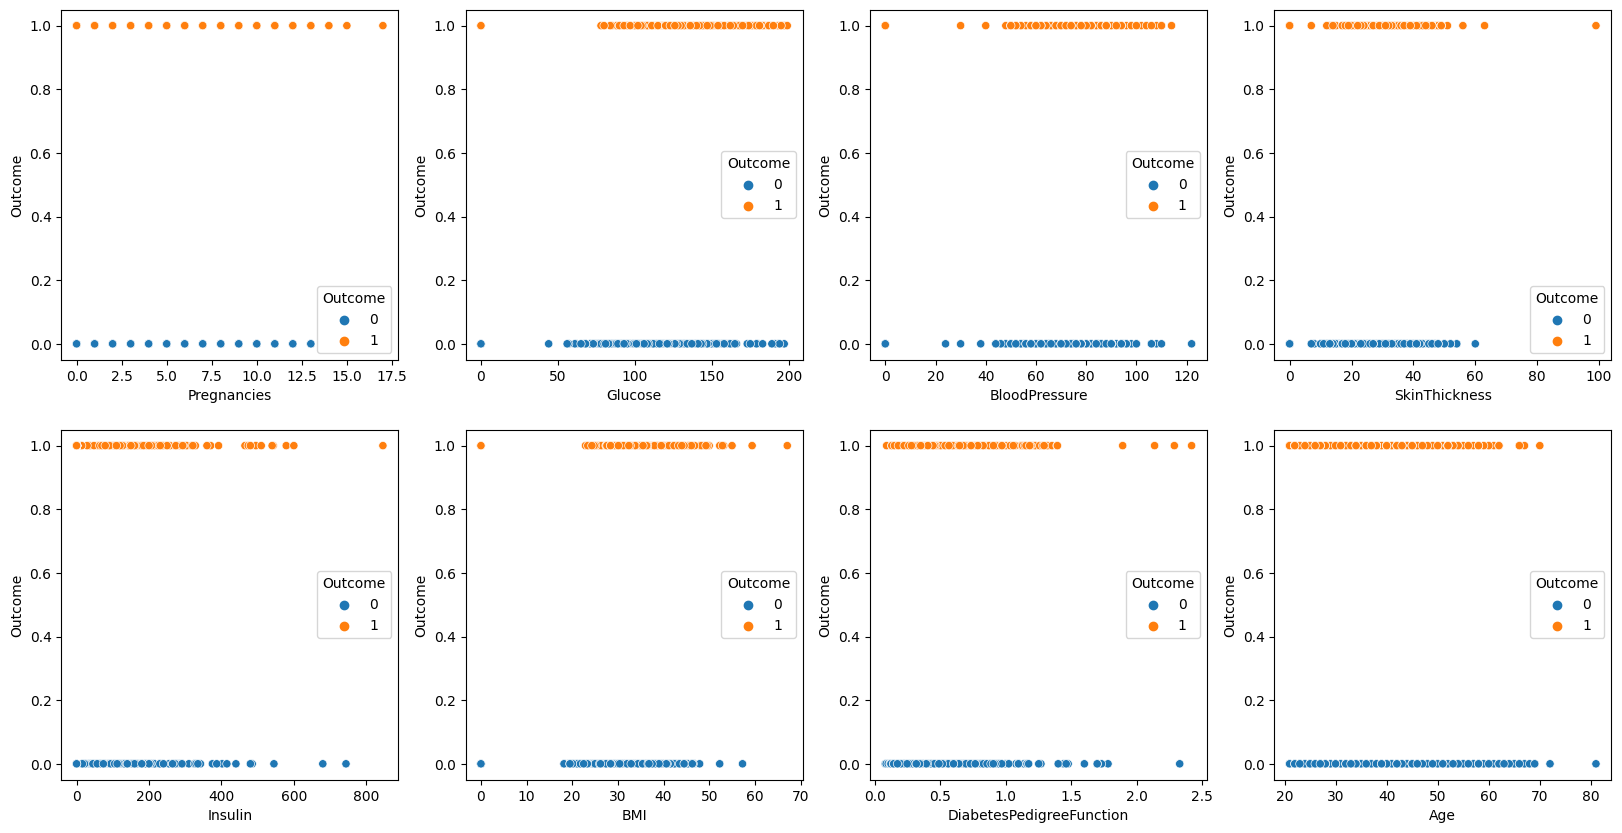

In [ ]:
fig, ax = plt.subplots(2,4,figsize=(20,10))
i = 0
j = 0
for col in cols[:-1]:
    sns.scatterplot(x=col,y='Outcome',data=diabetes_dataset,hue='Outcome',ax=ax[i][j])
    j += 1
    if j == 4:
        j = 0 # column
        i += 1 # next row

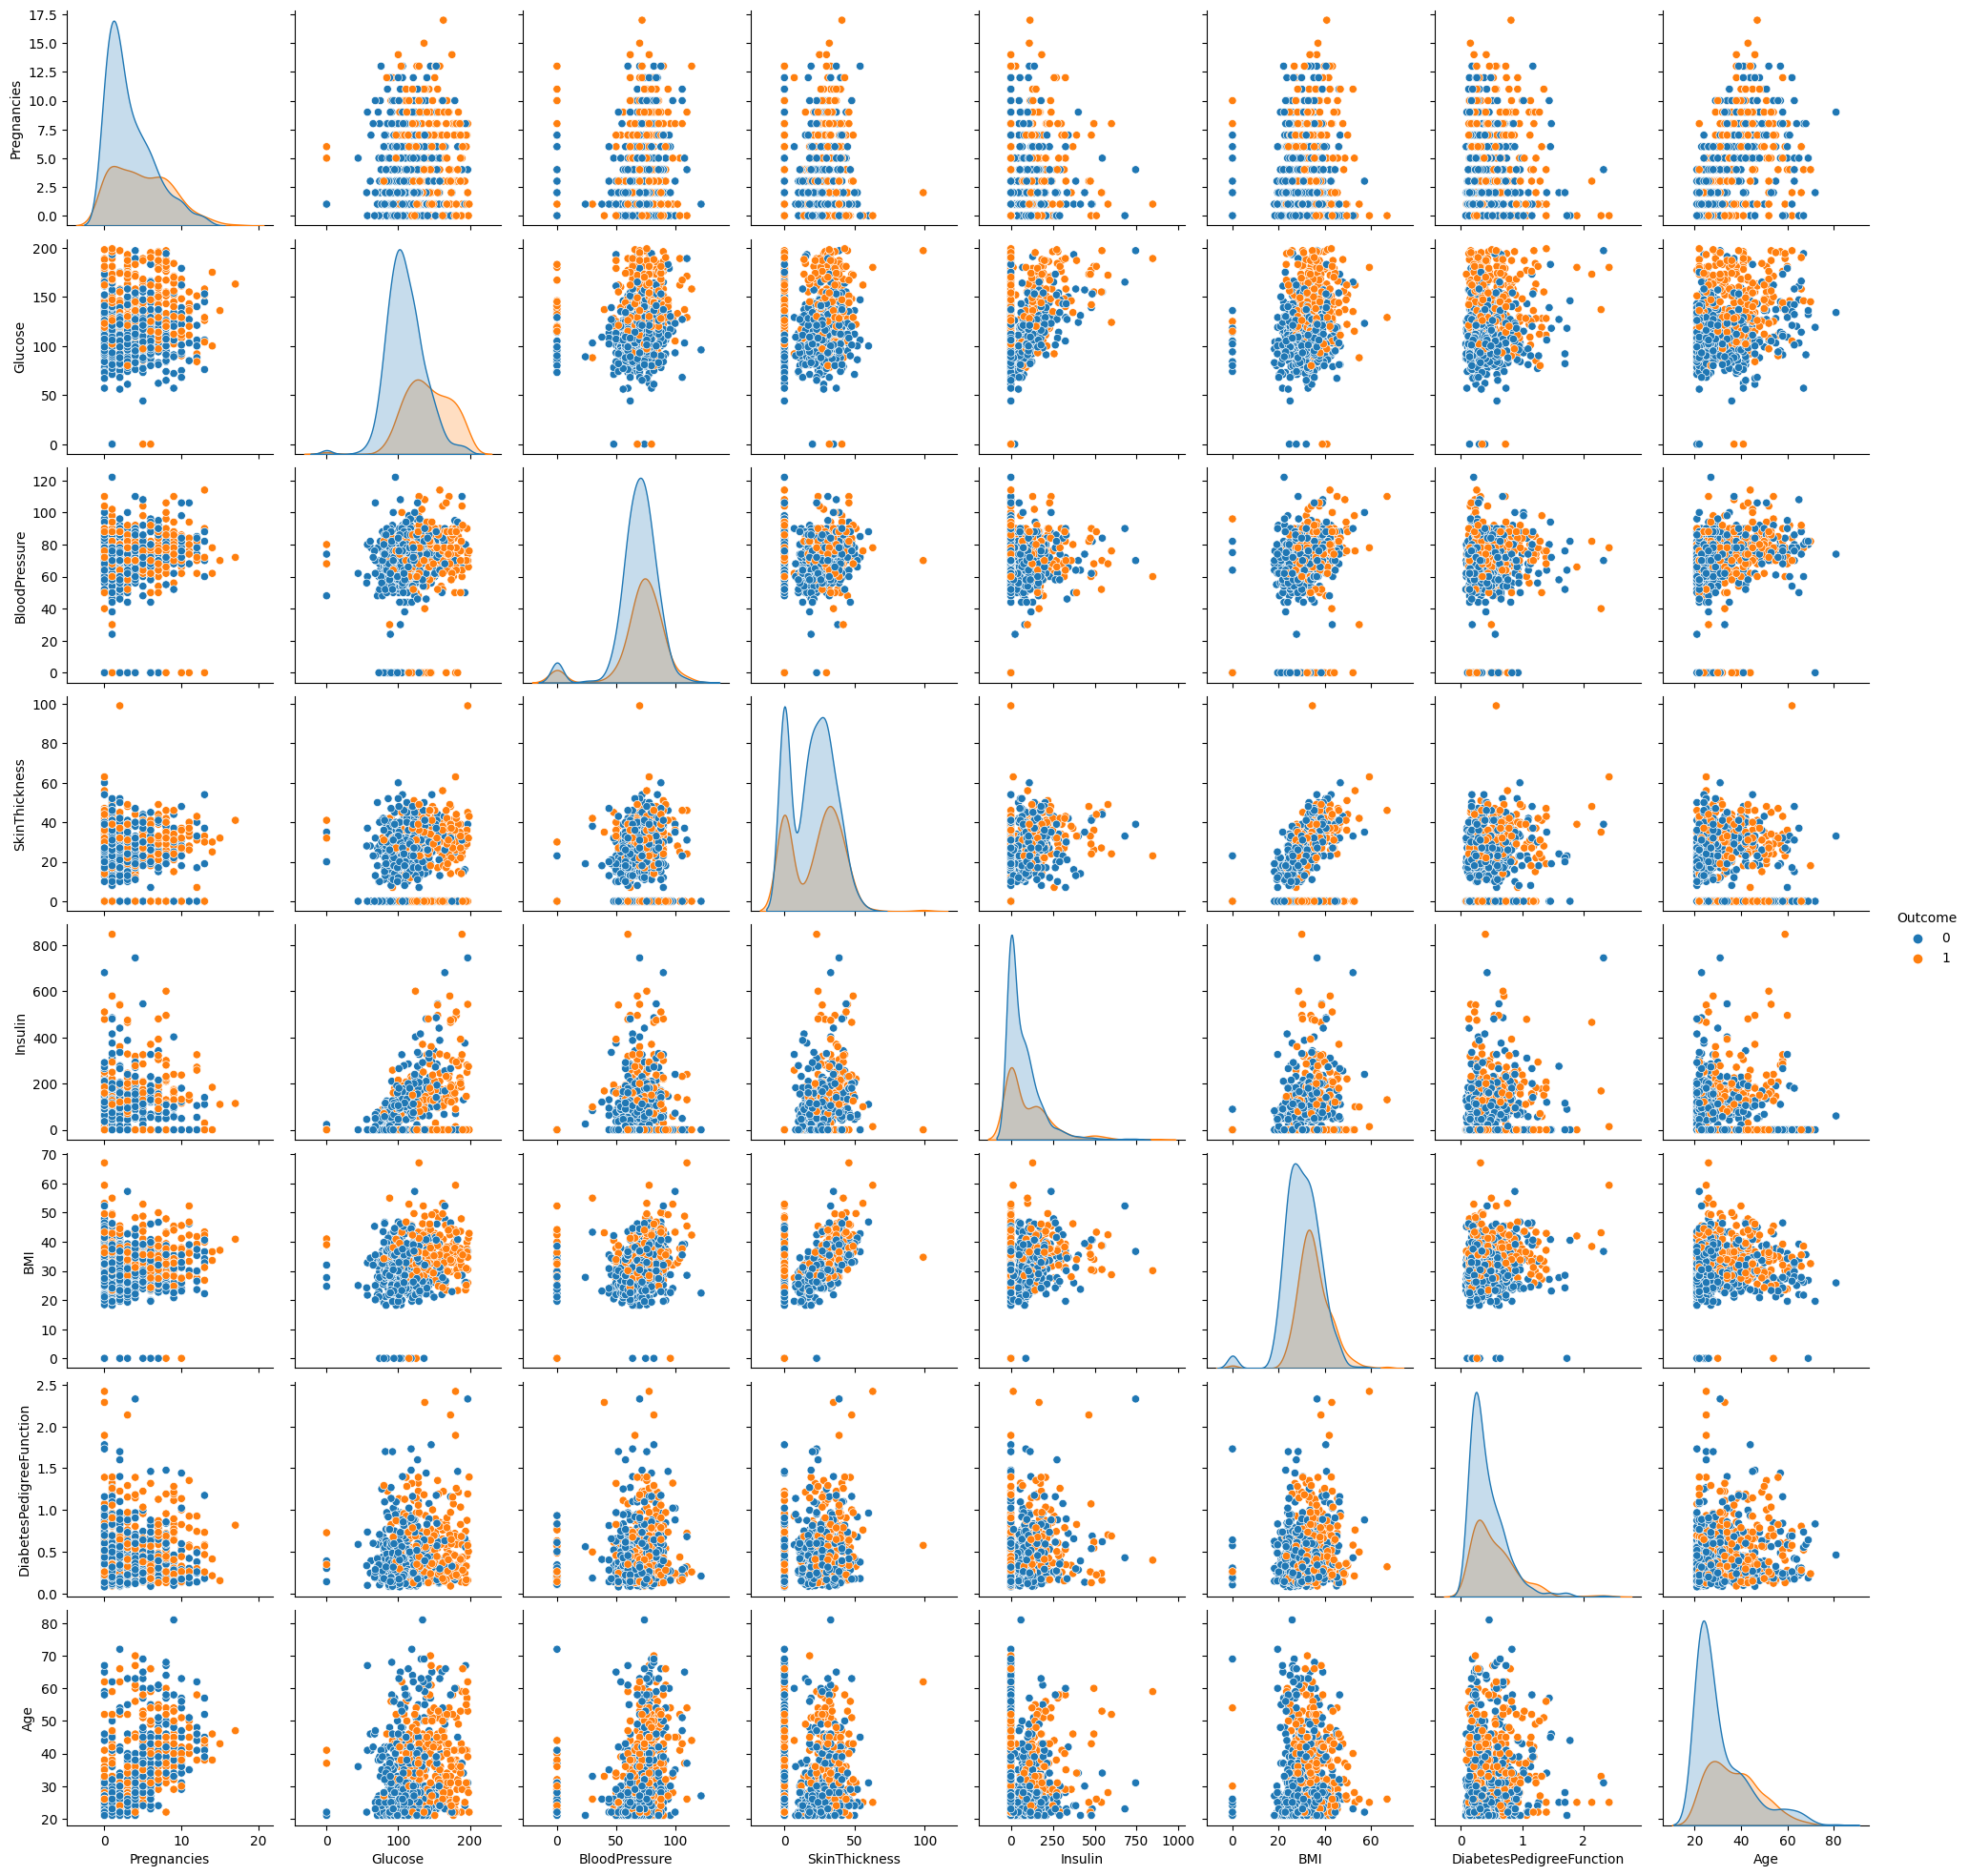

In [ ]:
sns.pairplot(data=diabetes_dataset,hue='Outcome',hue_order=[0,1])

DATA AUGUMENTATION

In [ ]:
import pandas as pd
import random

# Load the CSV file
data = pd.read_csv('/content/drive/MyDrive/diabetes.csv')

# Data augmentation logic
def augment_data(df, n=100):
    augmented_data = []
    for _ in range(n):
        # Implement your data augmentation techniques here
        # Example: Randomly shuffle rows
        augmented_data.append(df.sample(frac=1))
    augmented_df = pd.concat(augmented_data, ignore_index=True)
    return augmented_df

# Specify the number of augmentations you want (n) and call the function
n_augmentations = 100
augmented_df = augment_data(data, n_augmentations)

# Save augmented data to a new CSV file
augmented_df.to_csv('augmented_data.csv', index=False)

In [ ]:
diabetes_dataset1 = pd.read_csv('/content/augmented_data.csv')

In [ ]:
diabetes_dataset1.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            1       84             64             23      115  36.9   
1            5      130             82              0        0  39.1   
2            9      171            110             24      240  45.4   
3            0       73              0              0        0  21.1   
4            8       91             82              0        0  35.6   
5            2      108             62             10      278  25.3   
6            0      180             90             26       90  36.5   
7            4       97             60             23        0  28.2   
8            5      136             84             41       88  35.0   
9            1      109             58             18      116  28.5   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.471   28        0  
1                     0.956   37        1  
2                     0.721   54        1  
3                     0.342   25        0  
4                     0.587   68        0  
5                     0.881   22        0  
6                     0.314   35        1  
7                     0.443   22        0  
8                     0.286   35        1  
9                     0.219   22        0

In [ ]:
# Printing the last ten row of the dataset
diabetes_dataset1.tail(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
76790           12      100             84             33      105  30.0   
76791            0       97             64             36      100  36.8   
76792            9      152             78             34      171  34.2   
76793            4      154             62             31      284  32.8   
76794            2      105             75              0        0  23.3   
76795            4       99             68             38        0  32.8   
76796            2      142             82             18       64  24.7   
76797            0      180             90             26       90  36.5   
76798            2      102             86             36      120  45.5   
76799            2       74              0              0        0   0.0   

       DiabetesPedigreeFunction  Age  Outcome  
76790                     0.488   46        0  
76791                     0.600   25        0  
76792                     0.893   33        1  
76793                     0.237   23        0  
76794                     0.560   53        0  
76795                     0.145   33        0  
76796                     0.761   21        0  
76797                     0.314   35        1  
76798                     0.127   23        1  
76799                     0.102   22        0

In [ ]:
#Total number of rows & Columns
print("Total no of rows and coulmns=",diabetes_dataset1.shape)

#statistical measure of the data
print("statistical measure")
diabetes_dataset1.describe()

Total no of rows and coulmns= (76800, 9)
statistical measure


Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count  76800.000000  76800.000000   76800.000000   76800.000000  76800.000000   
mean       3.845052    120.894531      69.105469      20.536458     79.799479   
std        3.367406     31.952004      19.343328      15.941932    115.169699   
min        0.000000      0.000000       0.000000       0.000000      0.000000   
25%        1.000000     99.000000      62.000000       0.000000      0.000000   
50%        3.000000    117.000000      72.000000      23.000000     30.500000   
75%        6.000000    140.250000      80.000000      32.000000    127.250000   
max       17.000000    199.000000     122.000000      99.000000    846.000000   

                BMI  DiabetesPedigreeFunction           Age       Outcome  
count  76800.000000              76800.000000  76800.000000  76800.000000  
mean      31.992578                  0.471876     33.240885      0.348958  
std        7.879077                  0.331115     11.752649      0.476644  
min        0.000000                  0.078000     21.000000      0.000000  
25%       27.300000                  0.243750     24.000000      0.000000  
50%       32.000000                  0.372500     29.000000      0.000000  
75%       36.600000                  0.626250     41.000000      1.000000  
max       67.100000                  2.420000     81.000000      1.000000

In [ ]:
diabetes_dataset1['Outcome'].value_counts()

0    50000
1    26800
Name: Outcome, dtype: int64

In [ ]:
print("outcome grouped my mean")
diabetes_dataset1.groupby('Outcome').mean()

outcome grouped my mean


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164

In [ ]:
print("outcome grouped my standard deviation")
diabetes_dataset1.groupby('Outcome').std()

outcome grouped my standard deviation


Pregnancies    Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                     
0           3.014196  26.115307      18.045184      14.875198   98.767362   
1           3.734322  31.880572      21.452078      17.647025  138.432717   

              BMI  DiabetesPedigreeFunction        Age  
Outcome                                                 
0        7.682238                  0.298789  11.656098  
1        7.249540                  0.371666  10.947976

In [ ]:
X = diabetes_dataset1.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset1['Outcome']
print (X)
print (Y)

       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0                1       84             64             23      115  36.9   
1                5      130             82              0        0  39.1   
2                9      171            110             24      240  45.4   
3                0       73              0              0        0  21.1   
4                8       91             82              0        0  35.6   
...            ...      ...            ...            ...      ...   ...   
76795            4       99             68             38        0  32.8   
76796            2      142             82             18       64  24.7   
76797            0      180             90             26       90  36.5   
76798            2      102             86             36      120  45.5   
76799            2       74              0              0        0   0.0   

       DiabetesPedigreeFunction  Age  
0                         0.471   28  
1        

AUGUMENTED DATA ANALYSIS THROUGH GRAPHS

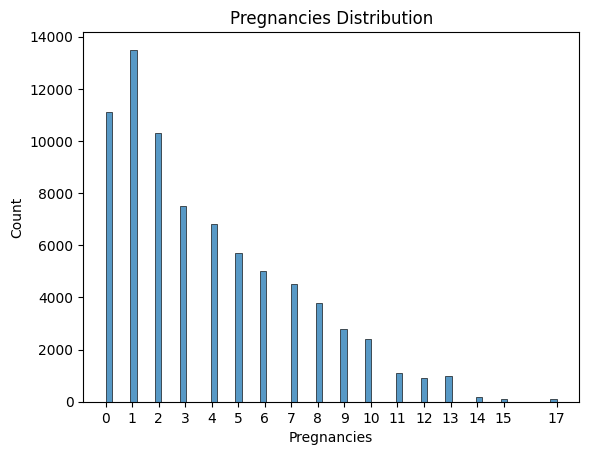

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
cols =diabetes_dataset1.columns
colors = ['Blue',"Green","Red","Black"]
plt.title(f"{cols[0]} Distribution")
sns.histplot(data=diabetes_dataset1, x=diabetes_dataset1[cols[0]])
plt.xticks(ticks=[i for i in diabetes_dataset1[cols[0]].unique()])
plt.show()

<Axes: xlabel='Age', ylabel='Density'>

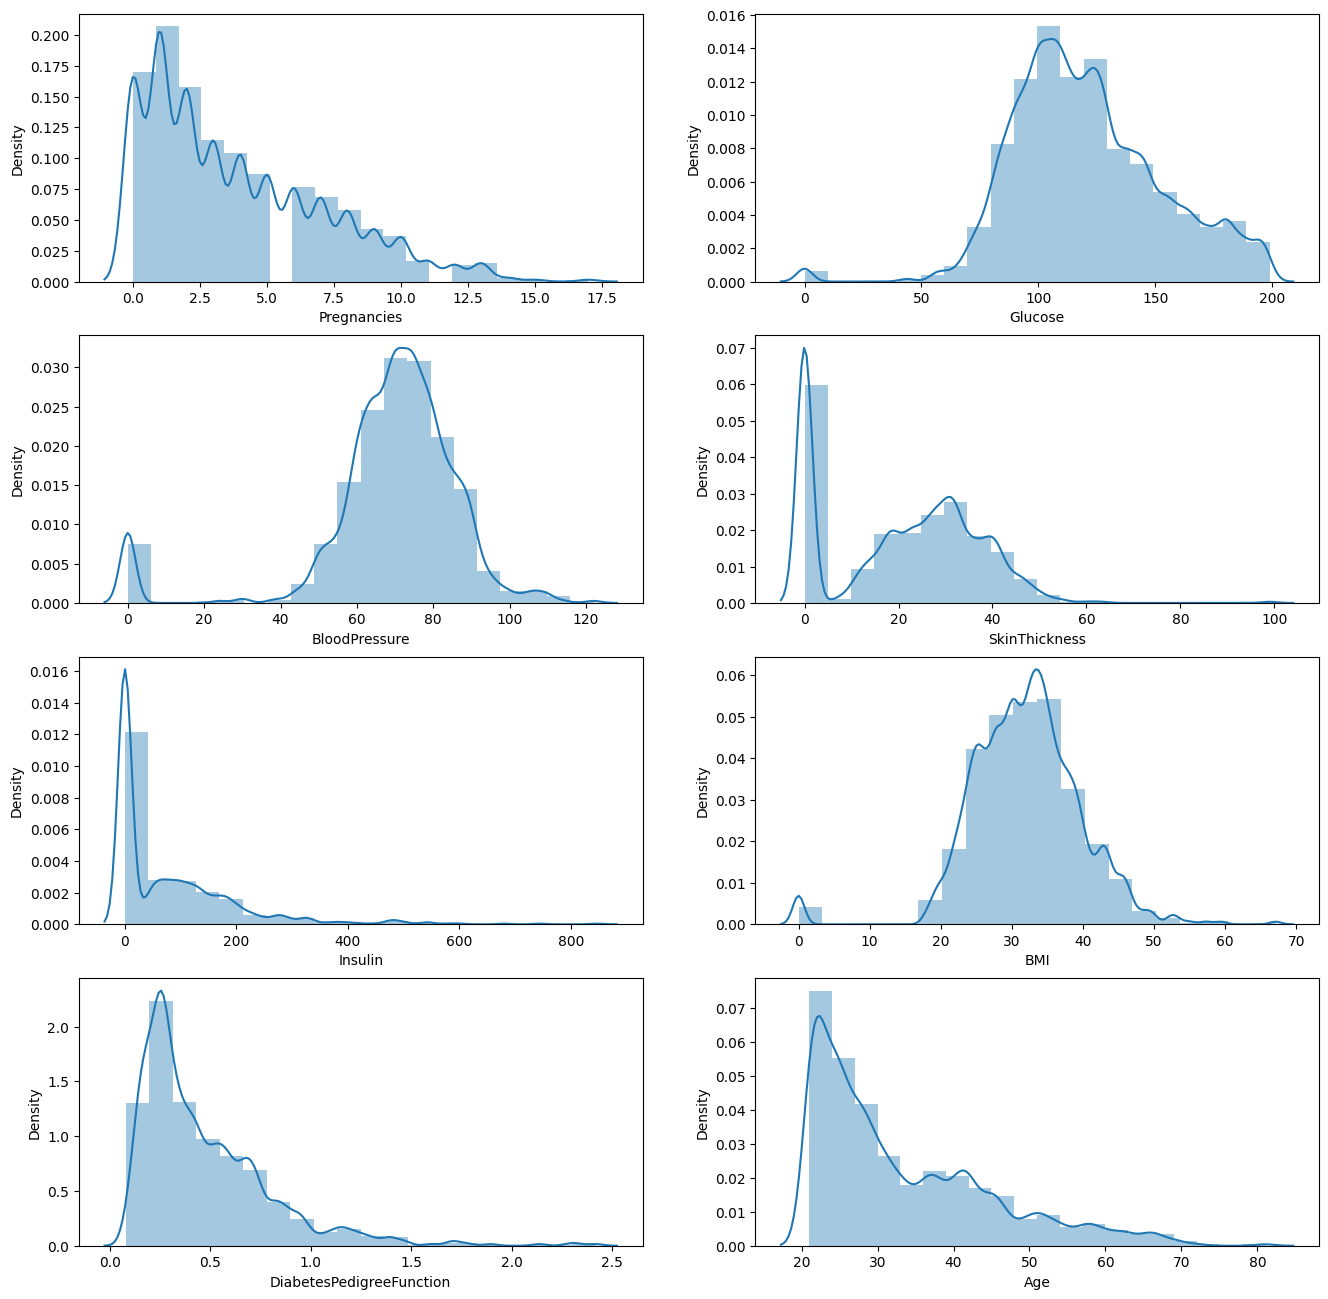

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(diabetes_dataset1.Pregnancies, bins = 20, ax=ax[0,0])
sns.distplot(diabetes_dataset1.Glucose, bins = 20, ax=ax[0,1])
sns.distplot(diabetes_dataset1.BloodPressure, bins = 20, ax=ax[1,0])
sns.distplot(diabetes_dataset1.SkinThickness, bins = 20, ax=ax[1,1])
sns.distplot(diabetes_dataset1.Insulin, bins = 20, ax=ax[2,0])
sns.distplot(diabetes_dataset1.BMI, bins = 20, ax=ax[2,1])
sns.distplot(diabetes_dataset1.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0])
sns.distplot(diabetes_dataset1.Age, bins = 20, ax=ax[3,1])

<Axes: xlabel='Age', ylabel='Count'>

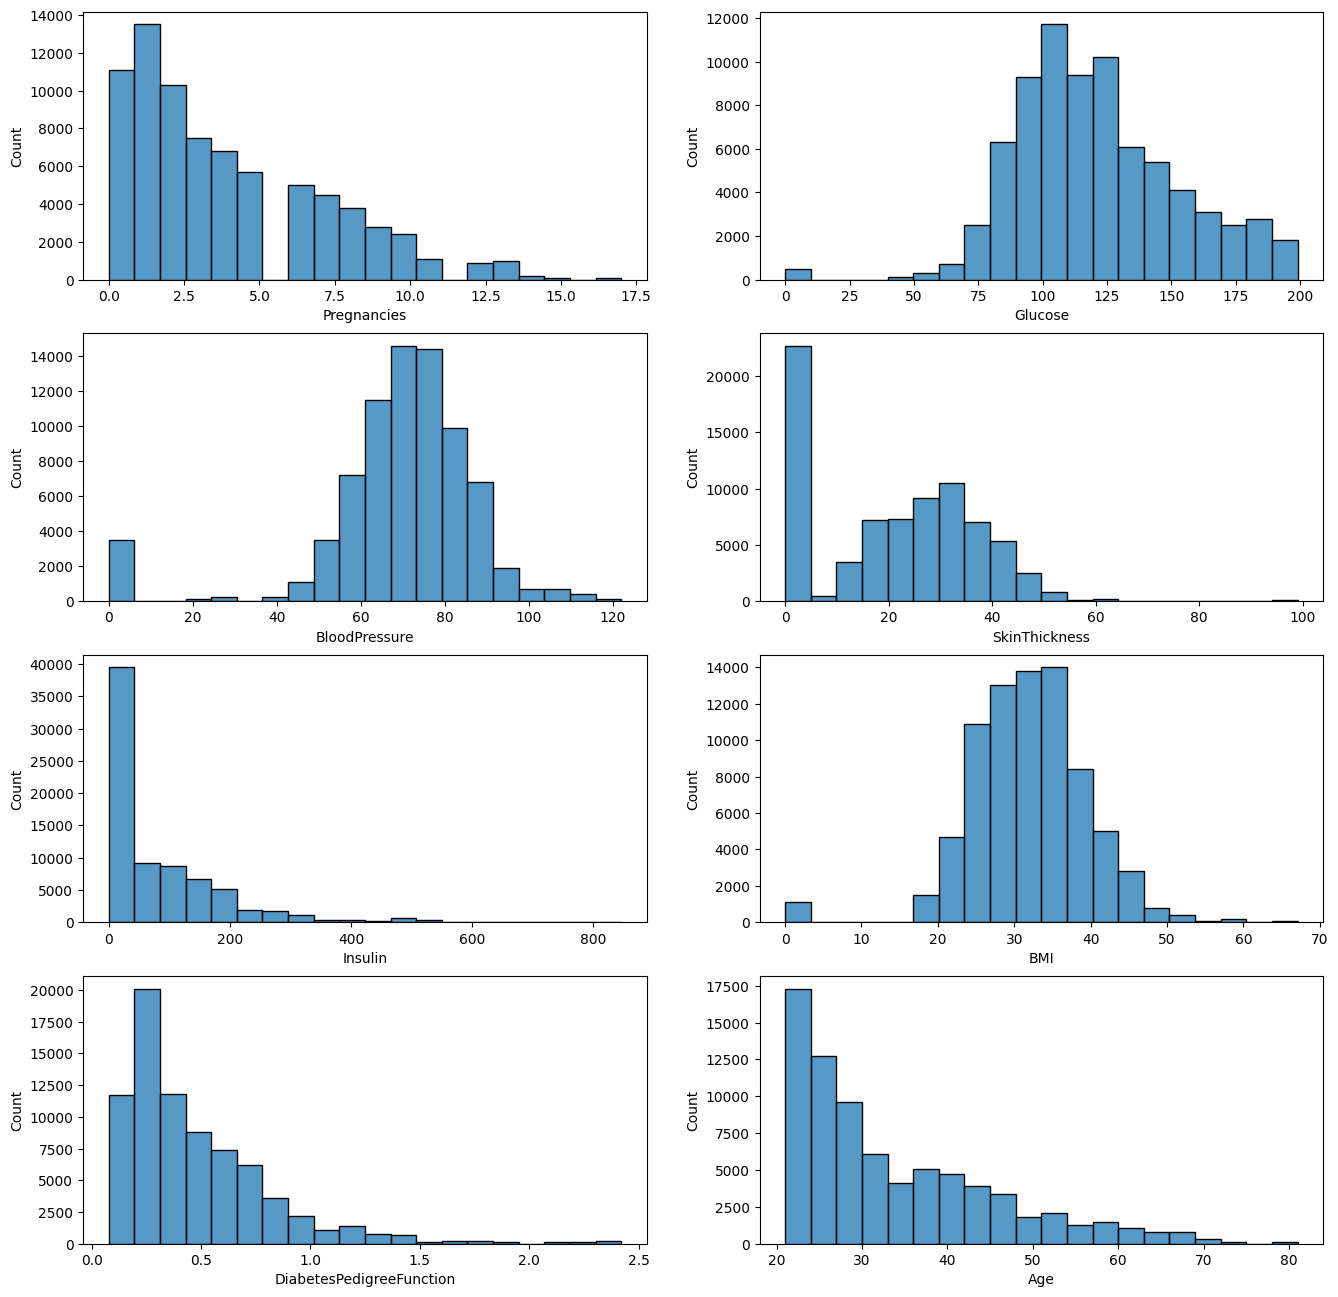

In [ ]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.histplot(diabetes_dataset1.Pregnancies, bins = 20, ax=ax[0,0])
sns.histplot(diabetes_dataset1.Glucose, bins = 20, ax=ax[0,1])
sns.histplot(diabetes_dataset1.BloodPressure, bins = 20, ax=ax[1,0])
sns.histplot(diabetes_dataset1.SkinThickness, bins = 20, ax=ax[1,1])
sns.histplot(diabetes_dataset1.Insulin, bins = 20, ax=ax[2,0])
sns.histplot(diabetes_dataset1.BMI, bins = 20, ax=ax[2,1])
sns.histplot(diabetes_dataset1.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0])
sns.histplot(diabetes_dataset1.Age, bins = 20, ax=ax[3,1])

OBSERVATIONS

1.The dataset contains more younger people. 2.The BMI of Majority of people is between 30-40 which means that majority of the people are have obesity. 3.Majority of People having insuling less than 200 4.Majority of people having Skinthickness between 20-40 5.Majority of People having BP between 60-80

CORRELATION MATRIX

In [ ]:
diabetes_dataset1.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

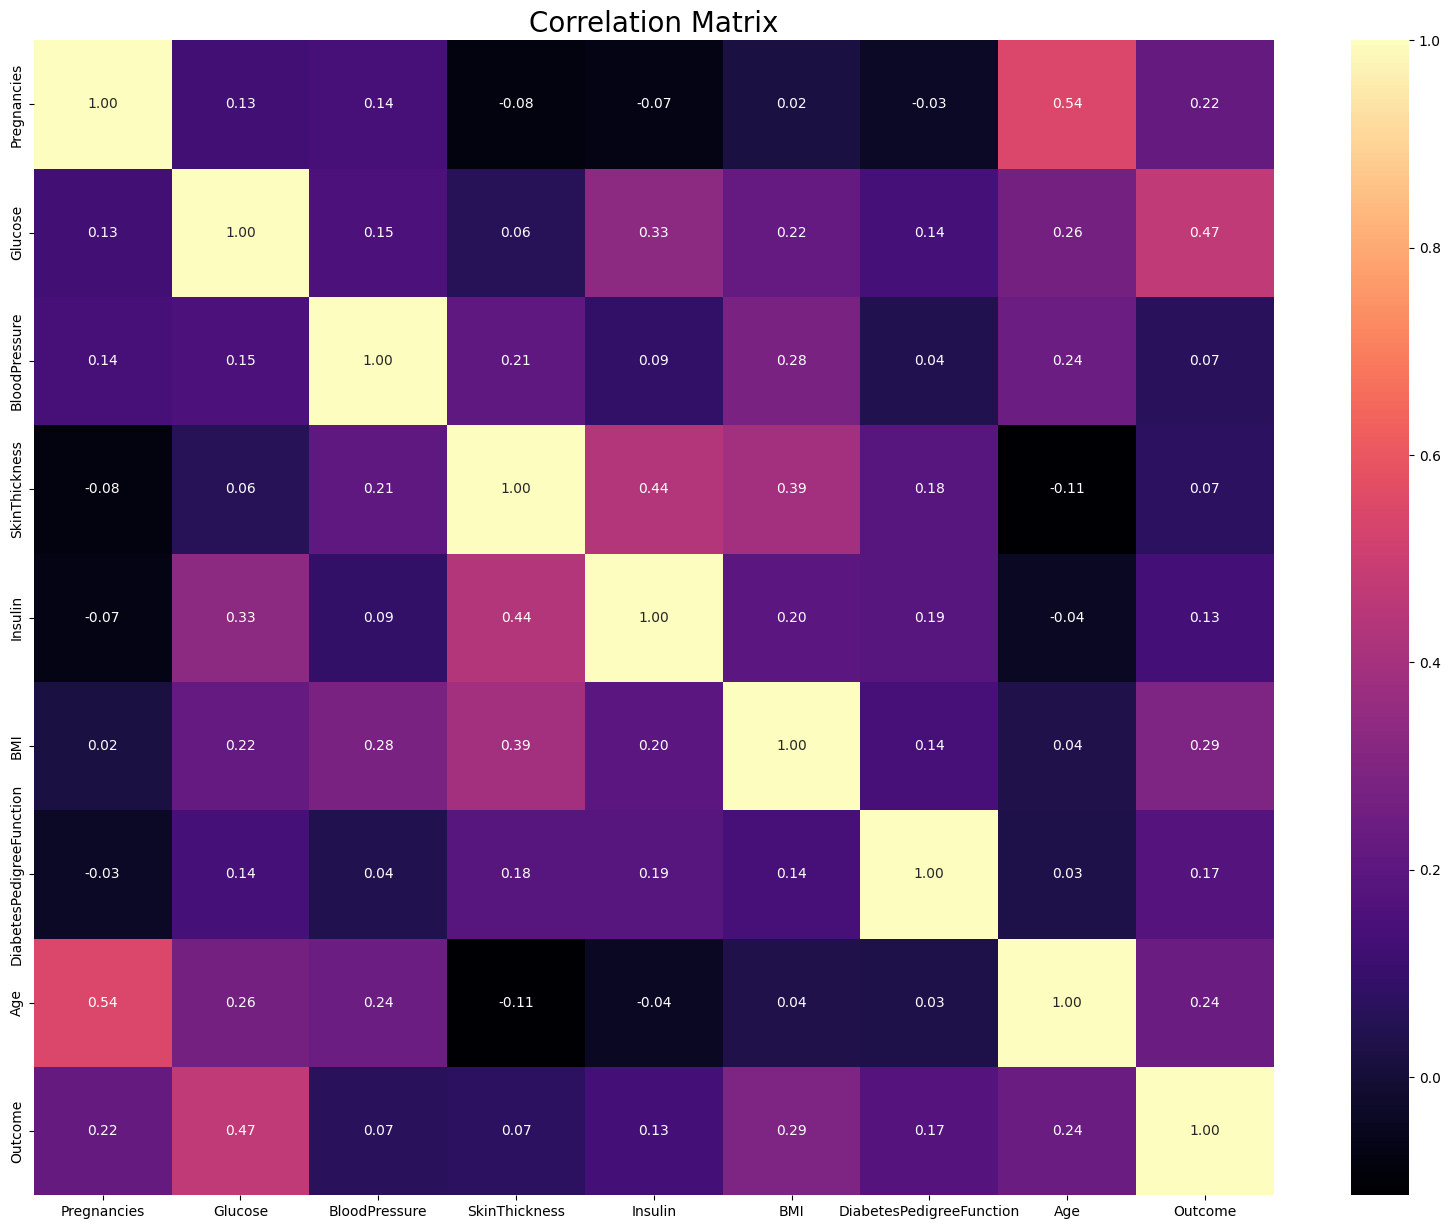

In [ ]:
# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(diabetes_dataset1.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()


Having Diebetes:	26800
Not Having Diebetes:	50000
diabetes_percentage:	0.35 %
not diabetes_percentage:	0.65 %


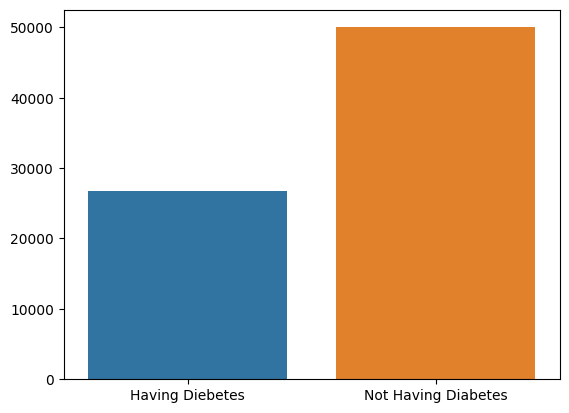

In [ ]:
having_diabetes = diabetes_dataset1[diabetes_dataset1["Outcome"]==1]
not_having = diabetes_dataset1[~(diabetes_dataset1["Outcome"]==1)]



print("Having Diebetes:\t"+ str(len(having_diabetes)))
print("Not Having Diebetes:\t"+ str(len(not_having
                                       )))
sns.barplot(x=['Having Diebetes','Not Having Diabetes'], y= [len(having_diabetes),len(not_having)],

           )

print("diabetes_percentage:\t" + str(round(len(having_diabetes)/len(diabetes_dataset1),2)) + " %")
print("not diabetes_percentage:\t" + str(round(len(not_having)/len(diabetes_dataset1),2)) + " %")

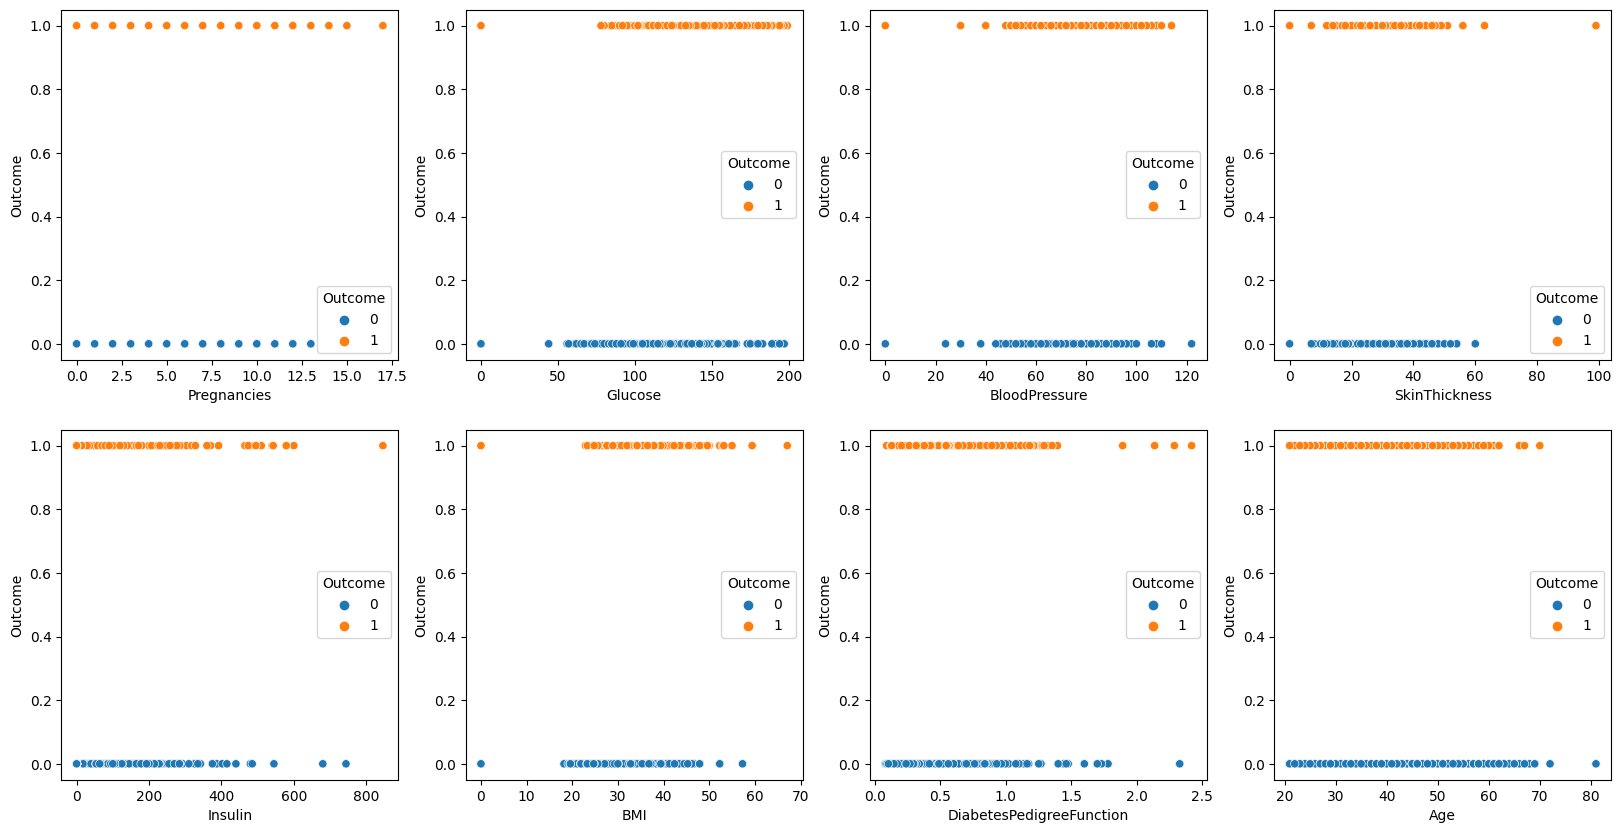

In [ ]:
fig, ax = plt.subplots(2,4,figsize=(20,10))
i = 0
j = 0
for col in cols[:-1]:
    sns.scatterplot(x=col,y='Outcome',data=diabetes_dataset1,hue='Outcome',ax=ax[i][j])
    j += 1
    if j == 4:
        j = 0 # column
        i += 1 # next row


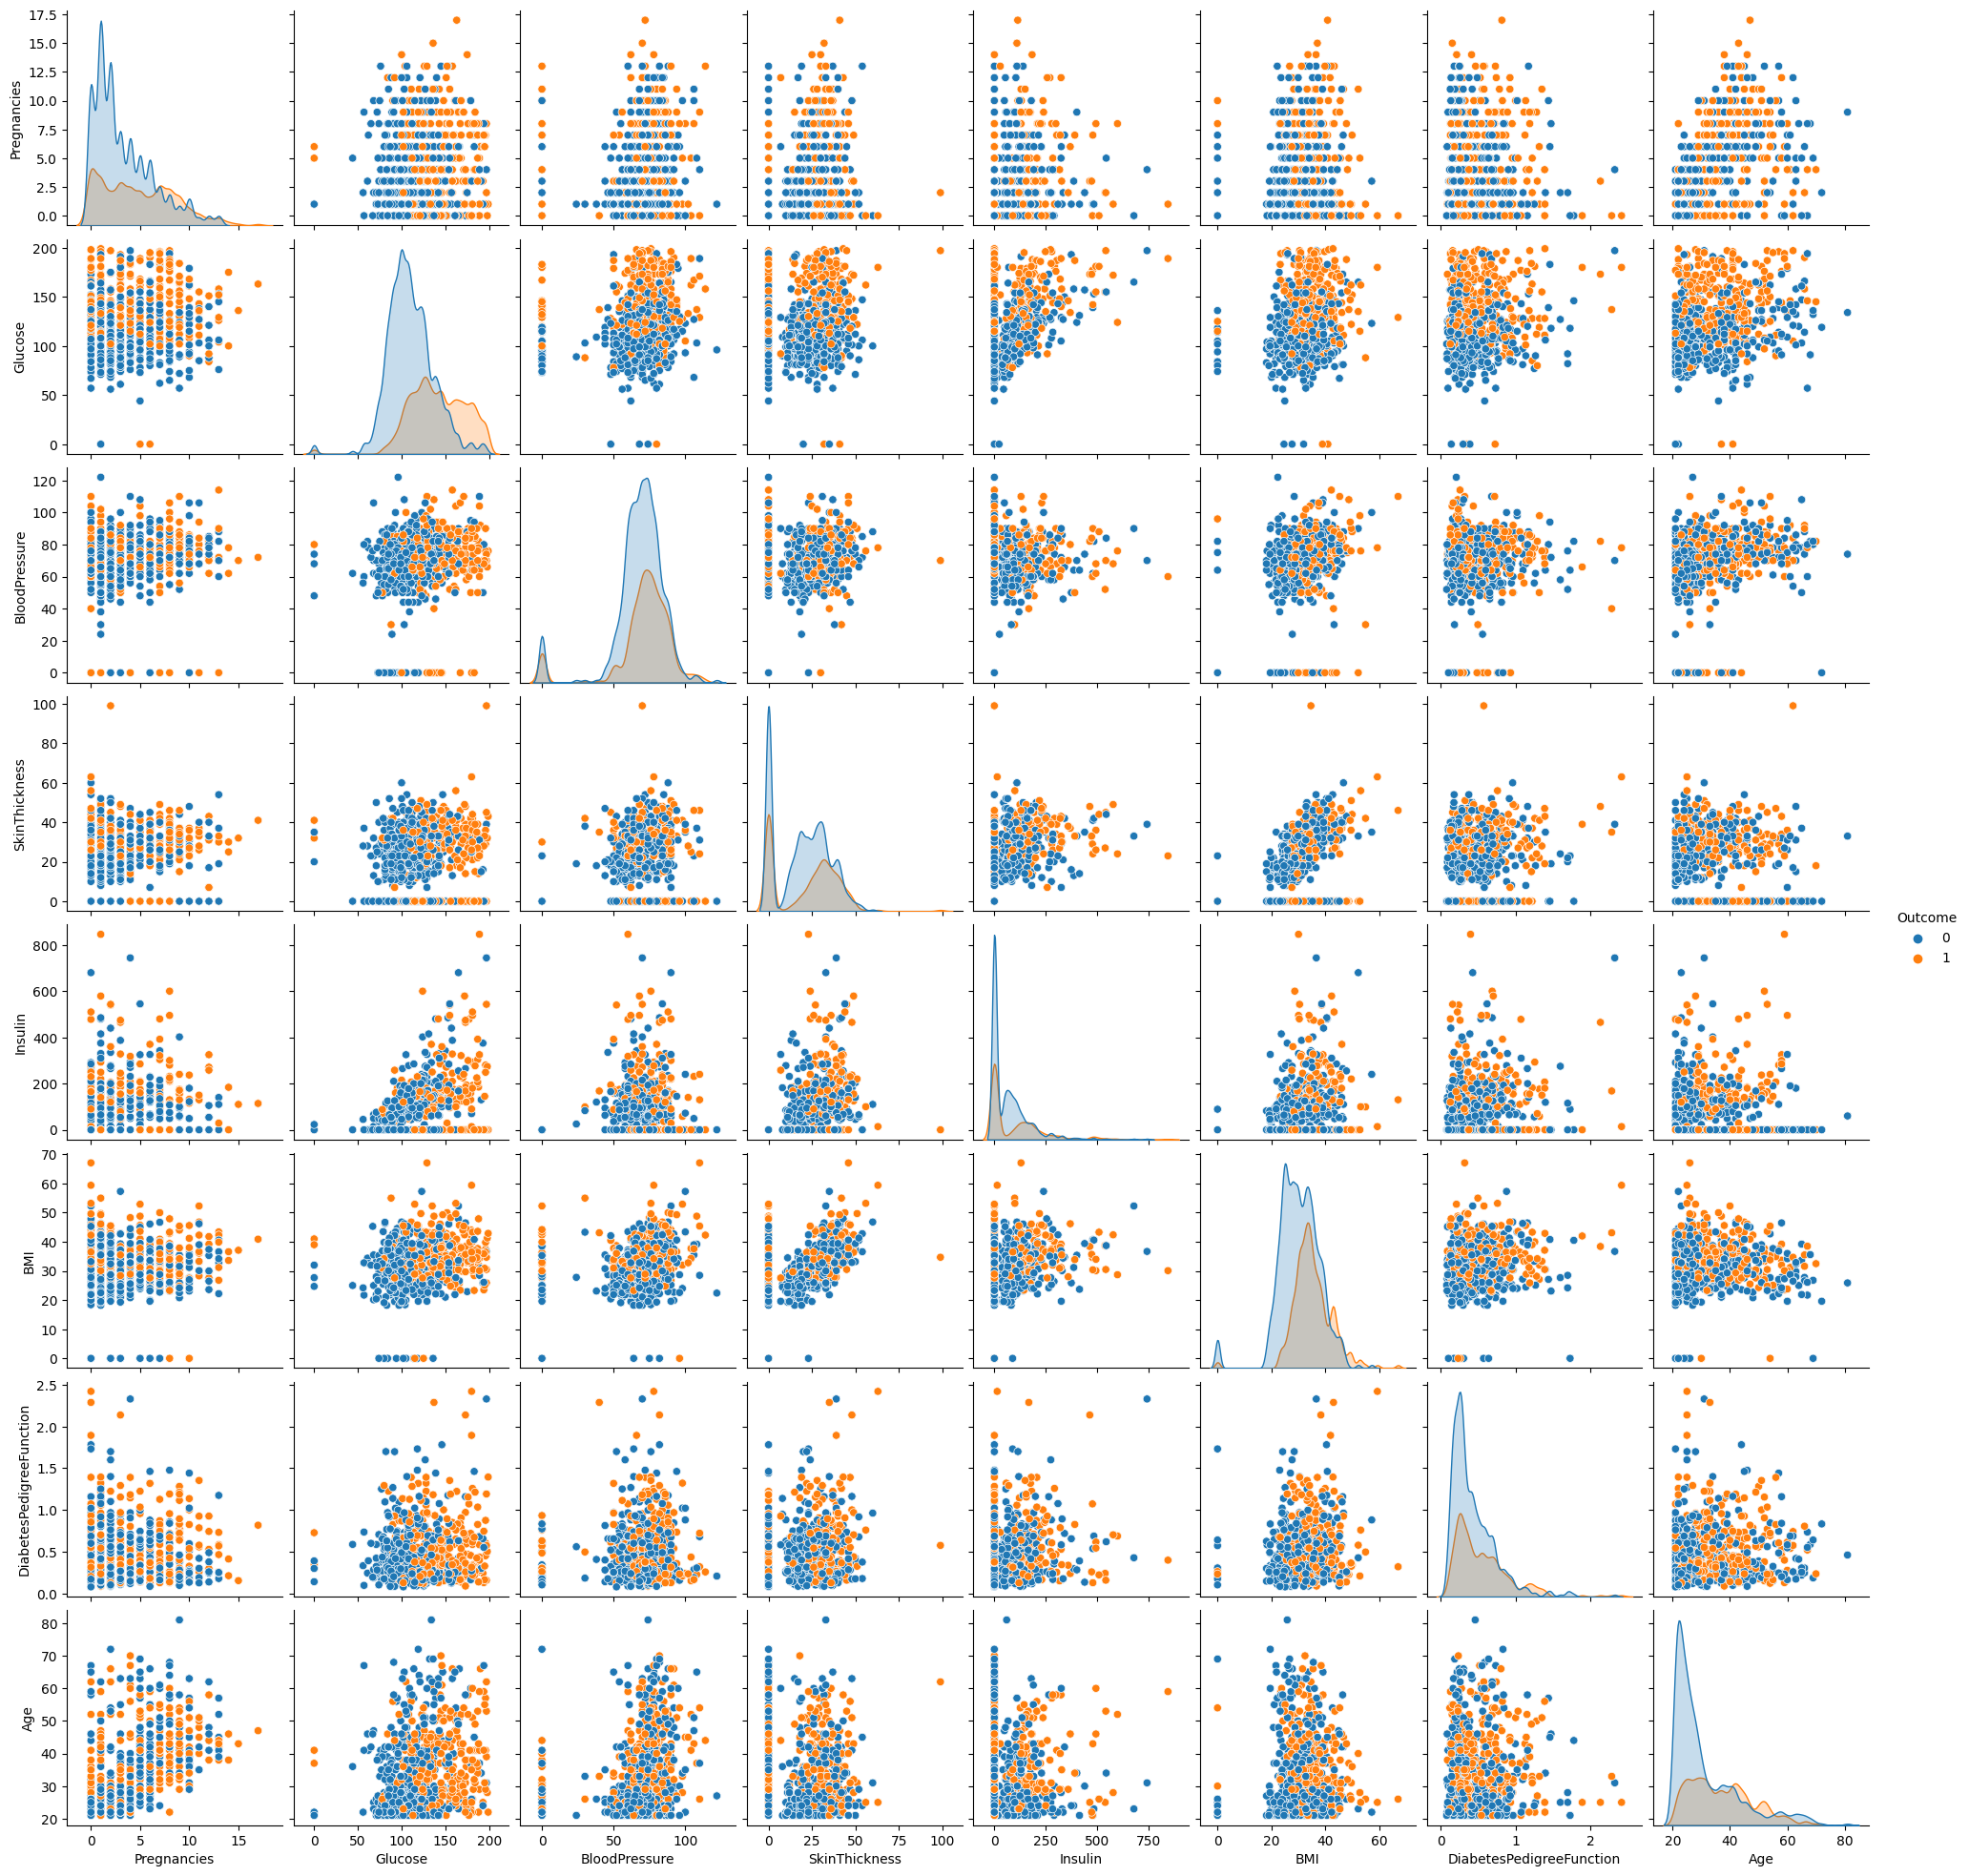

In [ ]:
sns.pairplot(data=diabetes_dataset1,hue='Outcome',hue_order=[0,1])

STANDARDIZATION OF DATA

In [ ]:
#Standardization is a common preprocessing step in machine learning that transforms the data so that it has a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
print(standardized_data)

[[-8.44885053e-01 -1.15469351e+00 -2.63941247e-01 ...  6.22846281e-01
  -2.64653629e-03 -4.45935165e-01]
 [ 3.42980797e-01  2.84975179e-01  6.66618252e-01 ...  9.02068621e-01
   1.46211102e+00  3.19854614e-01]
 [ 1.53084665e+00  1.56815814e+00  2.11415525e+00 ...  1.70165987e+00
   7.52383133e-01  1.76634642e+00]
 ...
 [-1.14185152e+00  1.84983245e+00  1.08020025e+00 ...  5.72078583e-01
  -4.76805169e-01  1.49679107e-01]
 [-5.47918591e-01 -5.91344890e-01  8.73409251e-01 ...  1.71435179e+00
  -1.04156736e+00 -8.71373930e-01]
 [-5.47918591e-01 -1.46766496e+00 -3.57259724e+00 ... -4.06047387e+00
  -1.11707033e+00 -9.56461683e-01]]


In [ ]:
A = standardized_data
B = diabetes_dataset1['Outcome']

In [ ]:
print(A)

[[-8.44885053e-01 -1.15469351e+00 -2.63941247e-01 ...  6.22846281e-01
  -2.64653629e-03 -4.45935165e-01]
 [ 3.42980797e-01  2.84975179e-01  6.66618252e-01 ...  9.02068621e-01
   1.46211102e+00  3.19854614e-01]
 [ 1.53084665e+00  1.56815814e+00  2.11415525e+00 ...  1.70165987e+00
   7.52383133e-01  1.76634642e+00]
 ...
 [-1.14185152e+00  1.84983245e+00  1.08020025e+00 ...  5.72078583e-01
  -4.76805169e-01  1.49679107e-01]
 [-5.47918591e-01 -5.91344890e-01  8.73409251e-01 ...  1.71435179e+00
  -1.04156736e+00 -8.71373930e-01]
 [-5.47918591e-01 -1.46766496e+00 -3.57259724e+00 ... -4.06047387e+00
  -1.11707033e+00 -9.56461683e-01]]


In [ ]:
print(B)

0        0
1        1
2        1
3        0
4        0
        ..
76795    0
76796    0
76797    1
76798    1
76799    0
Name: Outcome, Length: 76800, dtype: int64


In [ ]:
print(X.shape)
print(Y.shape)

(76800, 8)
(76800,)


In [ ]:
#Splitting the dataset into train data and test data
A_train, A_test, B_train, B_test = train_test_split(A,B, test_size = 0.2, stratify=B, random_state=42)

In [ ]:
print(A.shape, A_train.shape, A_test.shape)

(76800, 8) (61440, 8) (15360, 8)


In [ ]:
print(B.shape, B_train.shape, B_test.shape)

(76800,) (61440,) (15360,)


TRAINING AND EVALUATING THE MODEL

TESTING THROUGH VARIOUS ALGORITHMS

RANDOM FOREST CLASSIIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create and train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(A_train, B_train)

RandomForestClassifier()

In [ ]:
# accuracy score on the training data
A_train_prediction = rf_model.predict(A_train)
training_data_accuracy = accuracy_score(A_train_prediction, B_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [ ]:
# accuracy score on the test data
A_test_prediction = rf_model.predict(A_test)
test_data_accuracy = accuracy_score(A_test_prediction, B_test)
print('Accuracy score of the testing data : ', test_data_accuracy)

Accuracy score of the testing data :  1.0


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
B_pred = rf_model.predict(A_test)
B_true=B_test
# Assuming y_true and y_pred are the true labels and predicted labels, respectively.
precision = precision_score(B_true, B_pred)
recall = recall_score(B_true, B_pred)
f1 = f1_score(B_true, B_pred)
roc_auc = roc_auc_score(B_true, B_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)

Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0


LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create and train a Logistic Regression model
logistic_model = LogisticRegression()
logistic_model.fit(A_train, B_train)

LogisticRegression()

In [ ]:
# accuracy score on the training data
A_train_prediction = logistic_model.predict(A_train)
training_data_accuracy = accuracy_score(A_train_prediction, B_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.78427734375


In [ ]:
# accuracy score on the test data
A_test_prediction = logistic_model.predict(A_test)
test_data_accuracy = accuracy_score(A_test_prediction, B_test)
print('Accuracy score of the testing data : ', test_data_accuracy)

Accuracy score of the testing data :  0.7821614583333333


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
B_pred = logistic_model.predict(A_test)
B_true=B_test
# Assuming y_true and y_pred are the true labels and predicted labels, respectively.
precision = precision_score(B_true, B_pred)
recall = recall_score(B_true, B_pred)
f1 = f1_score(B_true, B_pred)
roc_auc = roc_auc_score(B_true, B_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)

Precision: 0.740219465648855
Recall: 0.5789179104477612
F1 Score: 0.6497068676716918
ROC-AUC: 0.7350089552238807


DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create and train a Decision Tree model
tree_model = DecisionTreeClassifier()
tree_model.fit(A_train, B_train)

DecisionTreeClassifier()

In [ ]:
# accuracy score on the training data
A_train_prediction = tree_model.predict(A_train)
training_data_accuracy = accuracy_score(A_train_prediction, B_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [ ]:

# accuracy score on the test data
A_test_prediction = tree_model.predict(A_test)
test_data_accuracy = accuracy_score(A_test_prediction, B_test)
print('Accuracy score of the testing data : ', test_data_accuracy)

Accuracy score of the testing data :  1.0


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
B_pred = tree_model.predict(A_test)
B_true=B_test
# Assuming y_true and y_pred are the true labels and predicted labels, respectively.
precision = precision_score(B_true, B_pred)
recall = recall_score(B_true, B_pred)
f1 = f1_score(B_true, B_pred)
roc_auc = roc_auc_score(B_true, B_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)

Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0


K NEIGHBOURS CLASSIFIER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train a KNN model with a specified number of neighbors (e.g., 5)
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(A_train, B_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
# accuracy score on the training data
A_train_prediction = knn_model.predict(A_train)
training_data_accuracy = accuracy_score(A_train_prediction, B_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


In [ ]:
# accuracy score on the test data
A_test_prediction = knn_model.predict(A_test)
test_data_accuracy = accuracy_score(A_test_prediction, B_test)
print('Accuracy score of the testing data : ', test_data_accuracy)

Accuracy score of the testing data :  1.0


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
B_pred = knn_model.predict(A_test)
B_true=B_test
# Assuming y_true and y_pred are the true labels and predicted labels, respectively.
precision = precision_score(B_true, B_pred)
recall = recall_score(B_true, B_pred)
f1 = f1_score(B_true, B_pred)
roc_auc = roc_auc_score(B_true, B_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)

Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0


SUPPORT VECTOR MACHINE

In [ ]:
classifier = svm.SVC(kernel='rbf',probability=True)

In [ ]:
#training the support vector Machine Classifier
classifier.fit(A_train, B_train)

SVC(probability=True)

In [ ]:
# accuracy score on the training data
A_train_prediction = classifier.predict(A_train)
training_data_accuracy = accuracy_score(A_train_prediction, B_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.93818359375


In [ ]:
# accuracy score on the test data
A_test_prediction = classifier.predict(A_test)
test_data_accuracy = accuracy_score(A_test_prediction, B_test)

In [ ]:
print('Accuracy score of the testing data : ', test_data_accuracy)

Accuracy score of the testing data :  0.934765625


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
B_pred = classifier.predict(A_test)
B_true=B_test
# Assuming y_true and y_pred are the true labels and predicted labels, respectively.
precision = precision_score(B_true, B_pred)
recall = recall_score(B_true, B_pred)
f1 = f1_score(B_true, B_pred)
roc_auc = roc_auc_score(B_true, B_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)

Precision: 0.9344098883572568
Recall: 0.8744402985074626
F1 Score: 0.9034309946029299
ROC-AUC: 0.9207701492537312


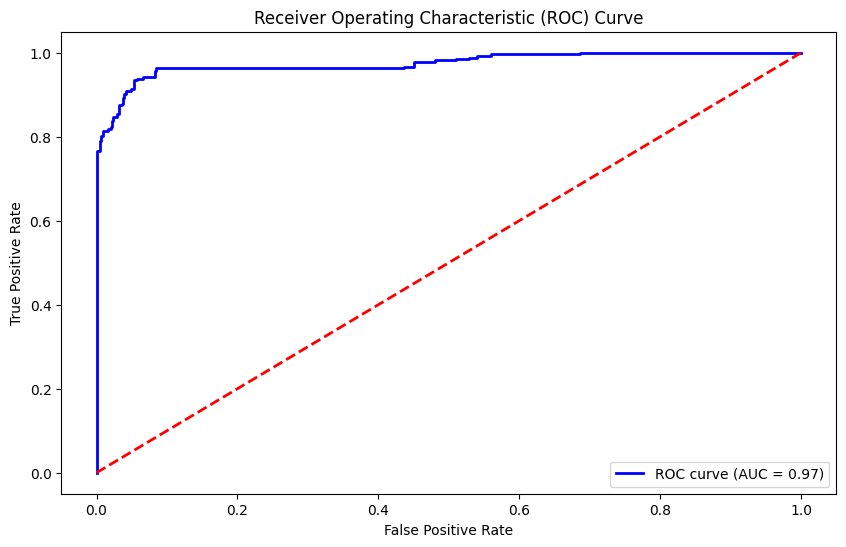

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the predicted probabilities
B_probs = classifier.predict_proba(A_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(B_test, B_probs)
roc_auc = roc_auc_score(B_test, B_probs)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

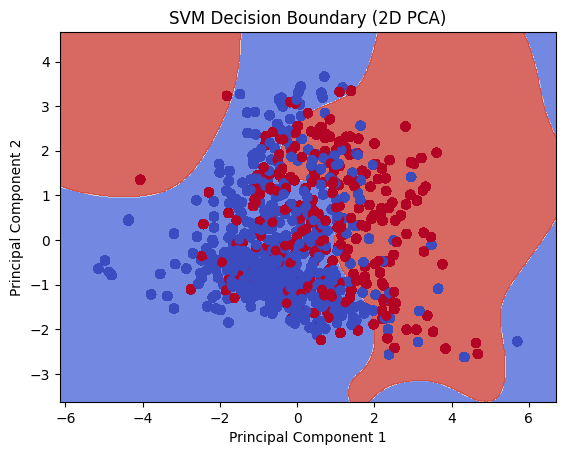

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming you have trained your SVM model
# X_train is your training data
# y_train is your training labels

# Reduce the dimensionality to 2D using PCA
pca = PCA(n_components=2)
A_reduced = pca.fit_transform(A_train)

# Train the SVM model on the reduced data
classifier.fit(A_reduced, B_train)

# Plot the decision boundary
h = .02  # Step size in the mesh
x_min, x_max = A_reduced[:, 0].min() - 1, A_reduced[:, 0].max() + 1
y_min, y_max = A_reduced[:, 1].min() - 1, A_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(A_reduced[:, 0], A_reduced[:, 1], c=B_train, cmap=plt.cm.coolwarm)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary (2D PCA)')
plt.show()

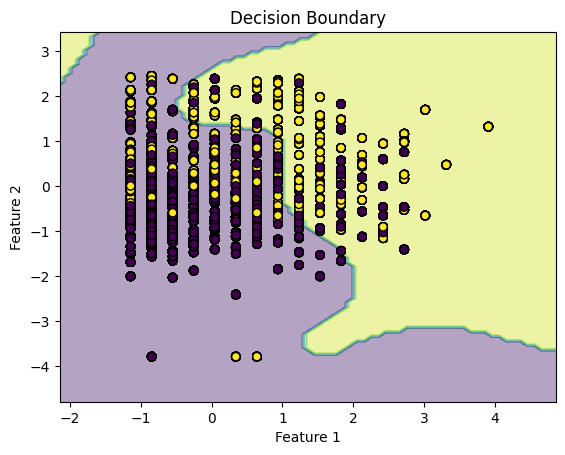

In [ ]:
# Plot the decision boundary
x_min, x_max = A[:, 0].min() - 1, A[:, 0].max() + 1
y_min, y_max = A[:, 1].min() - 1, A[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(A[:, 0], A[:, 1], c=B, edgecolors='k')
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

HYPERPARAMETER TUNING

GRID SEARCH

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],            # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': [0.001, 0.01, 0.1]  # Kernel coefficient
}


# Create the GridSearchCV object
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')

# Perform the grid search to find the best hyperparameters
grid_search.fit(A_train, B_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Fit the best model on the entire training data
best_model.fit(A_train, B_train)

# Make predictions using the best model
B_pred = best_model.predict(A_test)

# Evaluate the model's performance
accuracy = best_model.score(A_test, B_test)


RANDOM SEARCH

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the hyperparameter distributions
param_dist = {
    'C': uniform(0.1, 10),           # Regularization parameter
    'kernel': ['linear', 'rbf'],     # Kernel type
    'gamma': uniform(0.001, 0.1)     # Kernel coefficient
}


# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Perform the randomized search to find the best hyperparameters
random_search.fit(A_train, B_train)

# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Fit the best model on the entire training data
best_model.fit(A_train, B_train)

# Make predictions using the best model
B_pred = best_model.predict(A_test)

# Evaluate the model's performance
accuracy = best_model.score(A_test, B_test)